In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def least_squares_analysis(y_values, x_values=None, title="Least Squares Analysis"):
    """
    Perform least squares regression, show plot with regression results,
    and display the calculation table below.

    Parameters
    ----------
    y_values : list or array
        Dependent variable values (y).
    x_values : list or array, optional
        Independent variable values (x). If None, uses 1,2,...,N.
    title : str, optional
        Title of the combined figure.
    """

    # Convert to numpy arrays
    y = np.array(y_values, dtype=float)
    if x_values is None:
        x = np.arange(1, len(y)+1, dtype=float)
    else:
        x = np.array(x_values, dtype=float)

    # Perform least-squares fit: y = m*x + c
    A = np.vstack([x, np.ones(len(x))]).T
    slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]

    # Fitted values and residuals
    y_fit = slope * x + intercept
    residuals = y - y_fit

    # Error analysis
    N = len(x)
    x_mean = np.mean(x)
    Sxx = np.sum((x - x_mean)**2)
    sigma_y = np.sqrt(np.sum(residuals**2) / (N-2))

    # Errors in slope and intercept
    err_slope = sigma_y / np.sqrt(Sxx)
    err_intercept = sigma_y * np.sqrt(1/N + (x_mean**2)/Sxx)

    # Create DataFrame table
    df = pd.DataFrame({
        "x": x,
        "y": y,
        "x²": x**2,
        "xy": x*y
    })
    totals = pd.DataFrame({
        "x": [np.sum(x)],
        "y": [np.sum(y)],
        "x²": [np.sum(x**2)],
        "xy": [np.sum(x*y)]
    }, index=["Σ"])
    table = pd.concat([df, totals])

    # --- Combined Figure: Plot + Table ---
    fig, (ax1, ax2) = plt.subplots(
        nrows=2, ncols=1, figsize=(10,9),
        gridspec_kw={"height_ratios": [3, 1]}  # plot taller than table
    )

    # Top: Regression plot
    ax1.scatter(x, y, color='blue', label="Data points")
    ax1.plot(x, y_fit, color='red', label="Best Fit Line")

    textstr = '\n'.join((
        f"Slope (m)          = {slope:.4f} ± {err_slope:.4f}",
        f"Intercept (c)      = {intercept:.4f} ± {err_intercept:.4f}"
    ))
    ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="wheat", alpha=0.5))

    ax1.set_xlabel("m")
    ax1.set_ylabel("xₘ")
    ax1.legend()
    ax1.grid(True)

    # Bottom: Table
    ax2.axis("off")
    table_fig = ax2.table(cellText=table.round(3).values,
                          colLabels=table.columns,
                          rowLabels=table.index,
                          cellLoc='center', loc='center')

    table_fig.auto_set_font_size(False)
    table_fig.set_fontsize(10)
    table_fig.scale(1.3, 1.3)

    plt.suptitle(title, fontsize=14, y=0.98)
    plt.tight_layout()
    plt.show()

    # Return results in case needed programmatically
    return {
        "slope": slope,
        "intercept": intercept,
        "slope_error": err_slope,
        "intercept_error": err_intercept,
        "table": table
    }



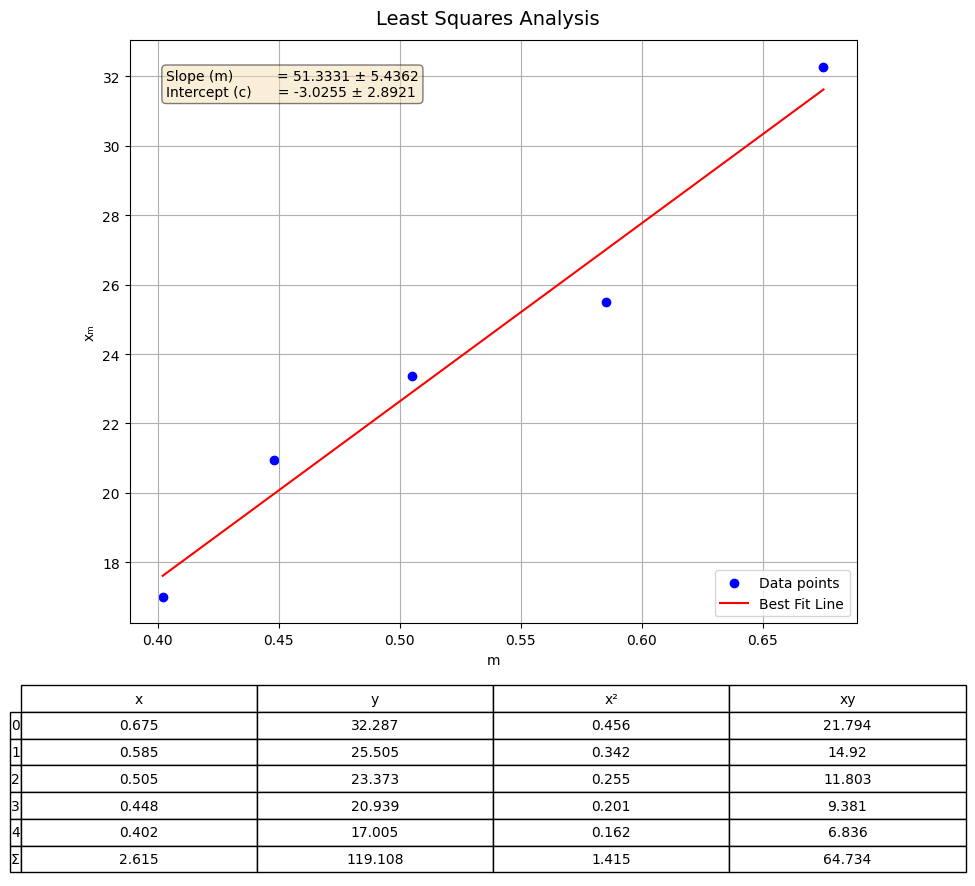

{'slope': np.float64(51.33312098047883),
 'intercept': np.float64(-3.0255372647904184),
 'slope_error': np.float64(5.436246427804614),
 'intercept_error': np.float64(2.8921474754780068),
 'table':        x           y        x²         xy
 0  0.675   32.287160  0.455625  21.793833
 1  0.585   25.505049  0.342225  14.920454
 2  0.505   23.372792  0.255025  11.803260
 3  0.448   20.938632  0.200704   9.380507
 4  0.402   17.004791  0.161604   6.835926
 Σ  2.615  119.108425  1.415183  64.733980}

In [8]:
x=[0.675,0.585,0.505,0.448,0.402]
y=[32.28715978,25.50504933,23.37279222,20.93863237,17.00479134]
least_squares_analysis(y_values=y,x_values=x)